In [145]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
import networkx as nx
import matplotlib.pyplot as plt
from qiskit.circuit.library import UnitaryGate
from qiskit.synthesis import TwoQubitWeylDecomposition

In [146]:
def cartanCircuit(VCxGate, transGate):
    circ = QuantumCircuit(2, name='+')
    phi = np.arctan(1 + np.sqrt(3))



    #qubit 0 after VCx
    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)

    #qubit 1 after VCx
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.p(9 * np.pi / 16, 1)

    circ.barrier(0)
    circ.barrier(1)

    circ.append(VCxGate.decompose(), [0, 1])


    #qubit 0
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)

    #qubit 1
    circ.p(15 * np.pi / 16, 1)
    circ.x(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)

    circ.append(transGate.conjugate(), [0])
    circ.append(transGate.conjugate(), [1])

    return circ

In [147]:
pi = np.pi
sqrt = np.sqrt
log = np.log

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)

weylDecomCirc = TwoQubitWeylDecomposition(VCx)
VCxGate = weylDecomCirc.circuit()

In [148]:
G = nx.Graph()

n = 8

G.add_nodes_from([0, n])

vertexList = []

for i in range(n):
    G.add_edge(0, i+1)

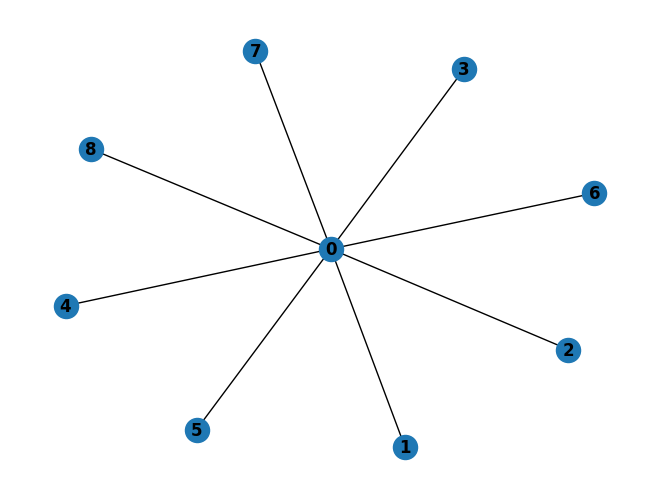

In [149]:
nx.draw(G, with_labels=True, font_weight='bold')

In [150]:
def CZqutrit(transGate):
    circ = QuantumCircuit(4, name="CZ")

    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.append(transGate, [2])
    circ.append(transGate, [3])
    omega = 2*np.pi/3

    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 3)
    circ.cp(-1 * omega, 1, 2)

    circ.append(transGate.conjugate().transpose(), [0])
    circ.append(transGate.conjugate().transpose(), [1])
    circ.append(transGate.conjugate().transpose(), [2])
    circ.append(transGate.conjugate().transpose(), [3])

    return circ

In [164]:
def createGraphCirc(G, transGate):
    vertexList = []
    
    n = G.number_of_nodes()
    for g in G.nodes():
        vertexList.append(list(G[g]))
        
    qubitList = [[i, i + 1] for i in range(0, 2 * n, 2)]
    test = []
    
    for i in range(len(vertexList)):
        for j in vertexList[i]:
            if sorted([qubitList[i][0], qubitList[i][1], qubitList[j][0], qubitList[j][1]]) not in test:
                test.append([qubitList[i][0], qubitList[i][1], qubitList[j][0], qubitList[j][1]])

    graphCirc = QuantumCircuit(2 * n)

    cartanCirc = cartanCircuit(VCxGate, transGate)
    
    for k in qubitList:
        graphCirc.append(cartanCirc, k)
    
    for i in test:
        graphCirc.append(CZqutrit(transGate), i)
        
    return graphCirc

In [165]:
#basisTransformationMatrix = np.array([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
basisTransformationMatrix = np.identity(2)
uniGate = UnitaryGate(basisTransformationMatrix)

In [166]:
circ = createGraphCirc(G, uniGate)

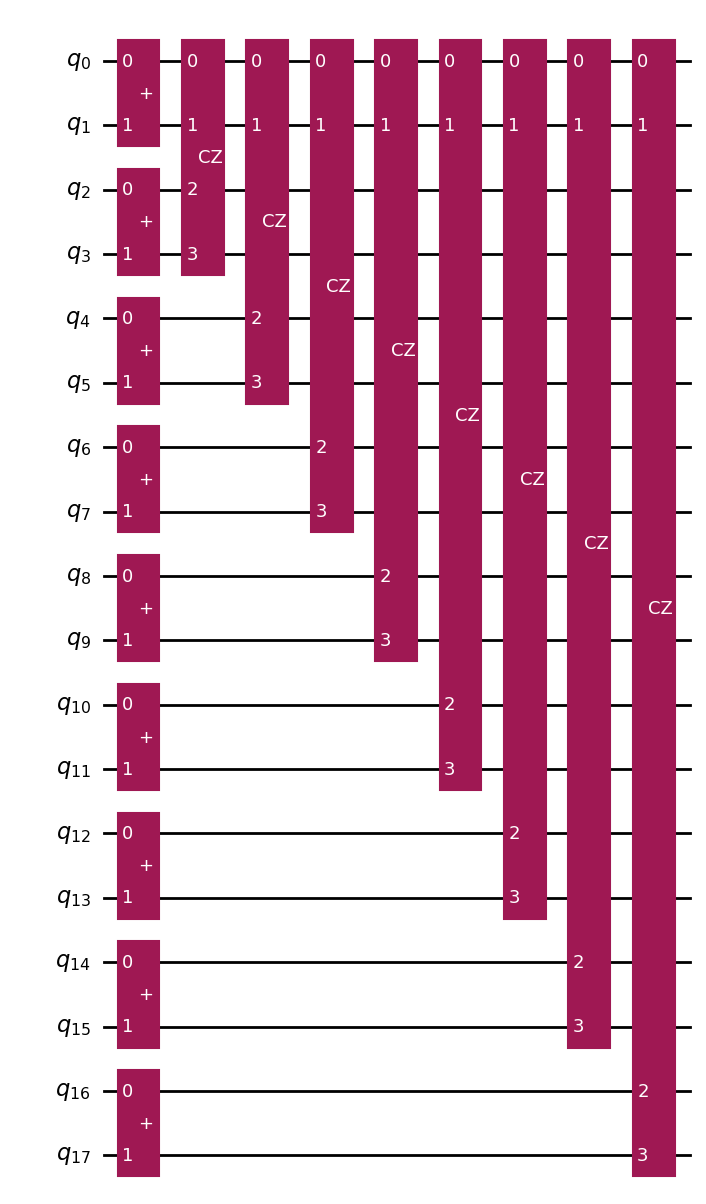

In [167]:
circ.draw(output='mpl')

In [176]:
circState = Statevector(circ)

In [179]:
circState.draw('latex')

<IPython.core.display.Latex object>

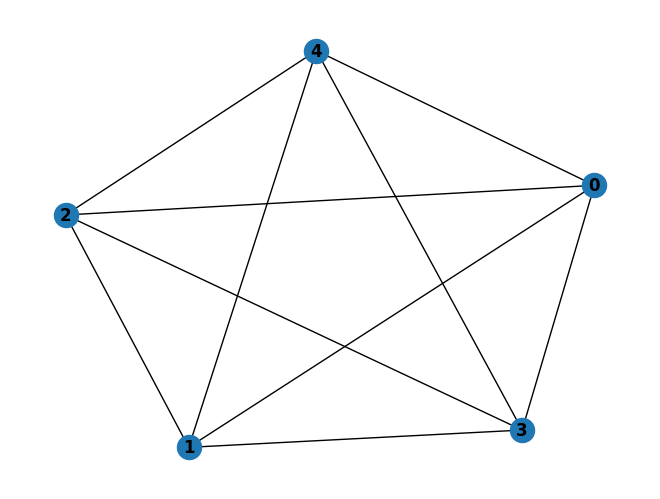

In [168]:
K_5 = nx.complete_graph(5)
nx.draw(K_5, with_labels=True, font_weight='bold')

In [169]:
K5circ = createGraphCirc(K_5, uniGate)

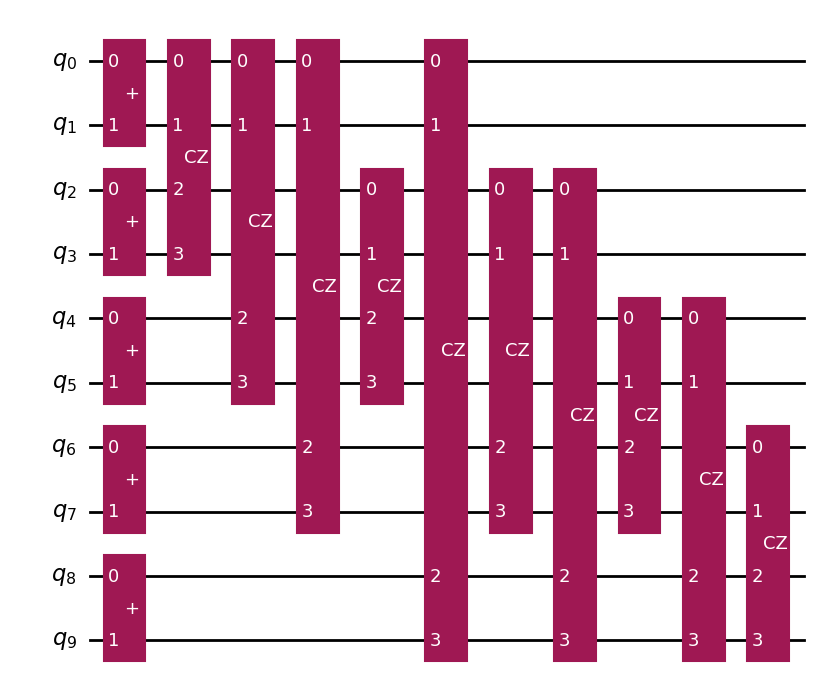

In [170]:
K5circ.draw('mpl')

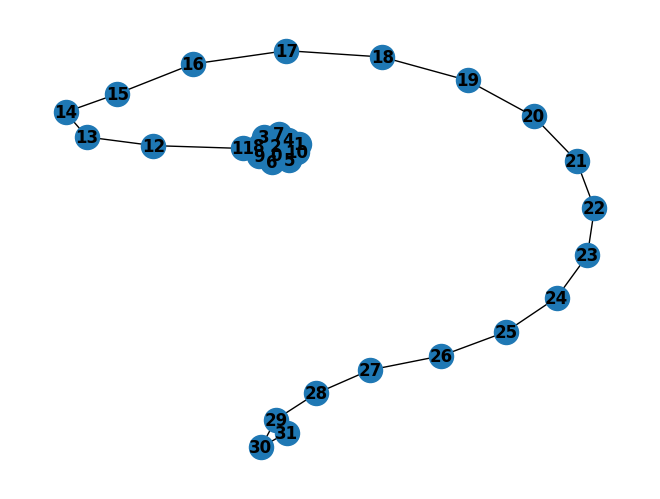

In [174]:
lollipop = nx.lollipop_graph(12, 20)
nx.draw(lollipop, with_labels=True, font_weight='bold')

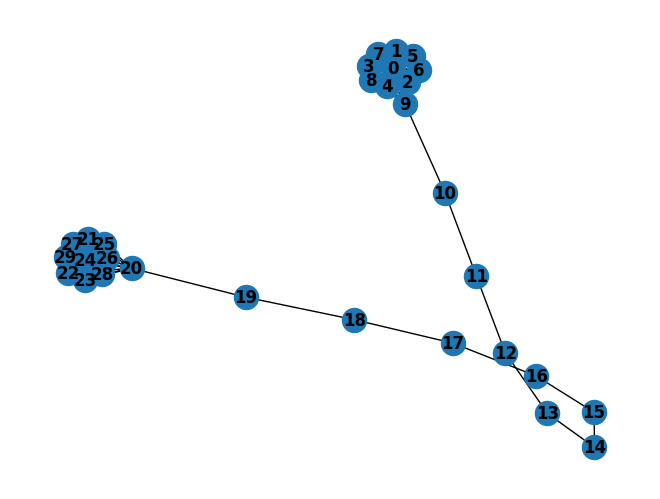

In [188]:
barbell = nx.barbell_graph(10, 10)
nx.draw(barbell, with_labels=True, font_weight='bold')

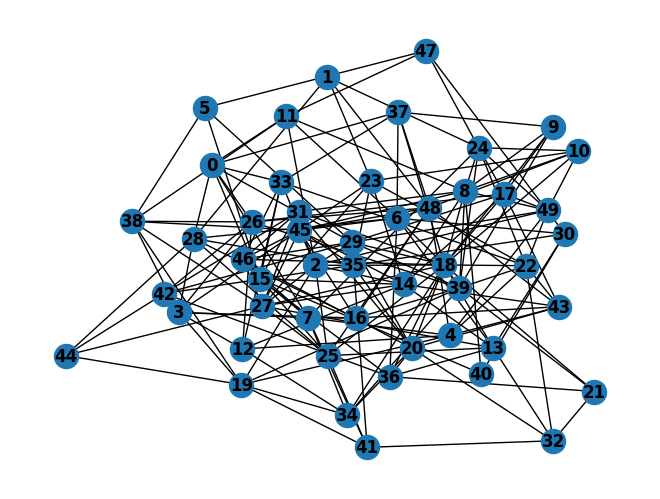

In [183]:
er = nx.erdos_renyi_graph(50, 0.15)
nx.draw(er, with_labels=True, font_weight='bold')

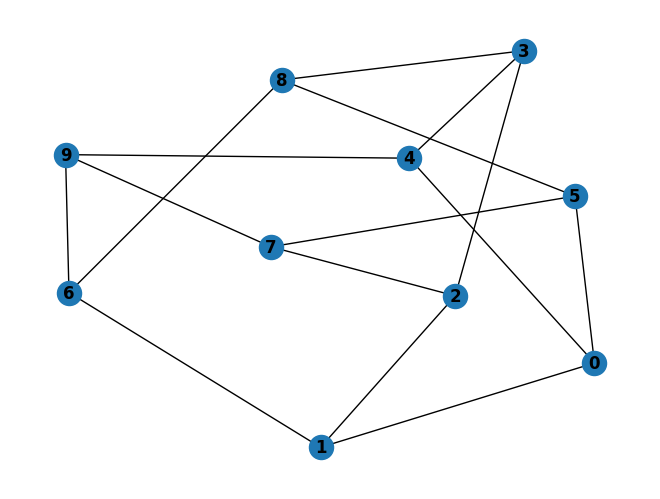

In [185]:
nx.draw(nx.petersen_graph(), with_labels=True, font_weight='bold')

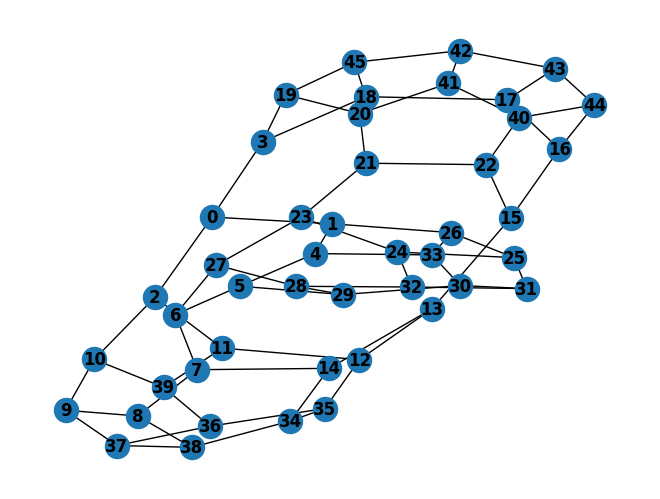

In [186]:
nx.draw(nx.tutte_graph(), with_labels=True, font_weight='bold')

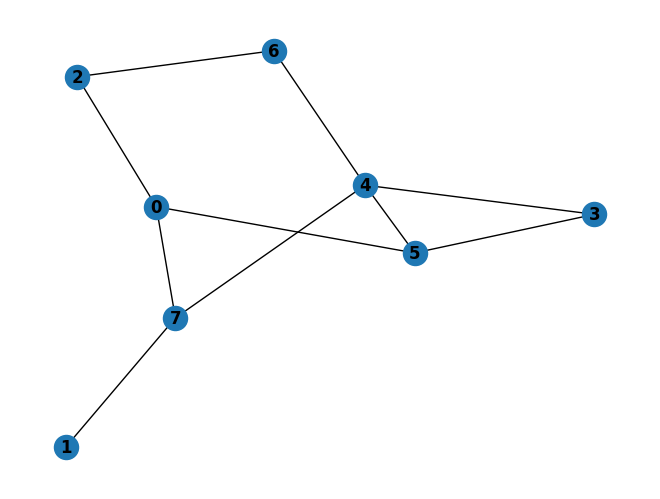

In [187]:
nx.draw(nx.sedgewick_maze_graph(), with_labels=True, font_weight='bold')

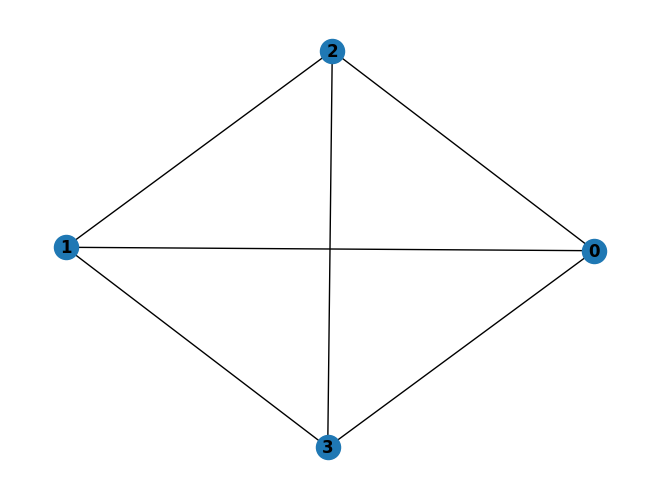

In [189]:
nx.draw(nx.tetrahedral_graph(), with_labels=True, font_weight='bold')